In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydot
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout


In [2]:
df=pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [14]:
df = pd.get_dummies(df, columns=['Gender', 'Geography'])


In [15]:
df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


In [16]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [17]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


In [18]:
X = df.drop('Exited', axis=1)
y = df['Exited']


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
X.columns.shape[0]

13

In [33]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_dim=X.columns.shape[0]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(8, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(8, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1,activation='sigmoid'),
])


In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                224       
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 batch_normalization_6 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dropout_7 (Dropout)         (None, 8)                 0         
                                                                 
 batch_normalization_7 (Batc  (None, 8)                32        
 hNormalization)                                      

In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [40]:
history=model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2)


Epoch 1/50
200/200 [==============================] - ETA: 0s - loss: 0.3923 - accuracy: 0.82 - 0s 1ms/step - loss: 0.3936 - accuracy: 0.8284 - val_loss: 0.3650 - val_accuracy: 0.8506
Epoch 2/50
200/200 [==============================] - 0s 1ms/step - loss: 0.3979 - accuracy: 0.8253 - val_loss: 0.3667 - val_accuracy: 0.8456
Epoch 3/50
200/200 [==============================] - 0s 1ms/step - loss: 0.3991 - accuracy: 0.8278 - val_loss: 0.3684 - val_accuracy: 0.8431
Epoch 4/50
200/200 [==============================] - 0s 1ms/step - loss: 0.3984 - accuracy: 0.8283 - val_loss: 0.3681 - val_accuracy: 0.8456
Epoch 5/50
200/200 [==============================] - 0s 1ms/step - loss: 0.3955 - accuracy: 0.8258 - val_loss: 0.3652 - val_accuracy: 0.8462
Epoch 6/50
200/200 [==============================] - 0s 1ms/step - loss: 0.3981 - accuracy: 0.8281 - val_loss: 0.3699 - val_accuracy: 0.8406
Epoch 7/50
200/200 [==============================] - 0s 1ms/step - loss: 0.3933 - accuracy: 0.8280 - val_

In [41]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3465 - accuracy: 0.8495


[0.346502423286438, 0.8495000004768372]

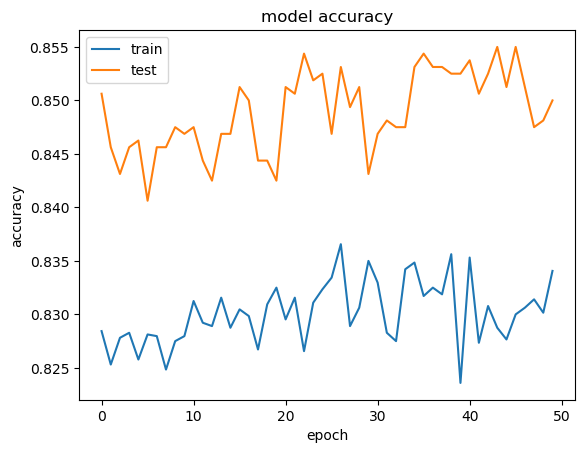

In [42]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

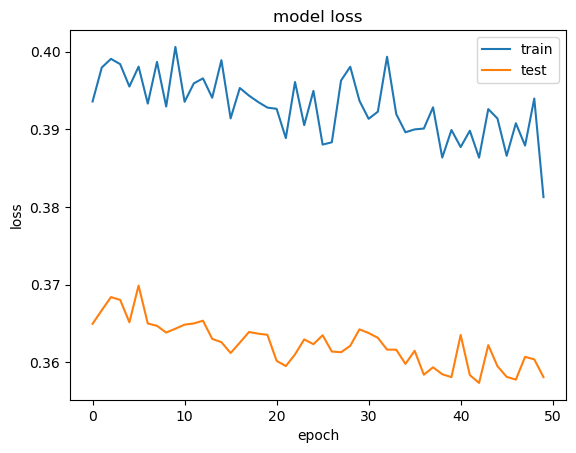

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [48]:
print((model.predict(sc.transform([[600, 1, 40, 3, 60000, 2, 1, 1, 50000, 0, 0,1,4]])) > 0.5).astype(int))


[[1]]


C:\Anaconda\envs\aiml\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [49]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[1583   24]
 [ 277  116]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1607
           1       0.83      0.30      0.44       393

    accuracy                           0.85      2000
   macro avg       0.84      0.64      0.67      2000
weighted avg       0.85      0.85      0.82      2000

0.8495
